<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [2]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [3]:
from IO import *
from cycler import cycler
import matplotlib as mpl
%matplotlib inline
from numba import autojit

%load_ext autoreload
%autoreload 2

today = datetime.date.today()
todayStr = '%04d%02d%02d' % (today.year, today.month, today.day)
# todayStr = '20151005'
DIRECTORY = os.path.expanduser("~/Dropbox/0000_PhD/figures/"+todayStr+"/")
CSV_DIR_TODAY = os.path.expanduser("~/Dropbox/0000_PhD/csv/"+todayStr+"/")
CSV_DIR = os.path.expanduser("~/Dropbox/0000_PhD/csv/")
FIG_DIR = os.path.expanduser("~/Dropbox/0000_PhD/figures/")
if not os.path.exists(DIRECTORY):
    os.makedirs(DIRECTORY)
    
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [4]:
### CODE TO PARSE ARGS
# parser = argparse.ArgumentParser()

# #-db DATABSE -u USERNAME -p PASSWORD -size 20
# parser.add_argument("-sWII", "--sWII", help="shared Chemical Synapses", type=int)
# parser.add_argument("-N", "--N", help="number of neurons", type=int)

# args = parser.parse_args()
# N = args.N
# sWII = args.sWII

In [5]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [6]:
# Instantiate classes
cortex = Cortex()
trn = TRN()
gr = GRAPH(cortex)

In [9]:
# #-------------------------------
# # PARAMS SEARCH
# #-------------------------------
c = cortex
c.N = 400
c.g = 10
c.d1 = 10
c.d2 = 30000
c.d3 = 10
c.initTime()
c.sigma = 60
c.WII = 1400 #2800
c.S = 100
c.model = "gp-izh-subnetworks"
c.glob = 0
c.plast = 1

# shared weights
c.sG = 10
c.sWII = 10

c.FACT = 1
c.r=0

c.ratio = 15
c.LTD  = 1e-0*4.7e-6 * c.FACT * c.N
c.LTP = c.ratio * c.LTD
c.dt = 0.25
c.tauv=15

c.with_currents = True

sWIIList = [0,10]
sGList = [0,1,5,10,15,20,25]
sGList = np.arange(0,25,4)
LTDList = [1e-9*4.7e-6 * c.FACT * c.N, 1e-0*4.7e-6 * c.FACT * c.N]
taulist = np.arange(11,95,4)


-1   1

-2   2

## READ CSV DATA

In [10]:
# df = pd.read_csv('/Users/GP1514/Dropbox/0000 - PhD/figures/20160628/' + 'df-plast-ok2.csv')
columns = ['tauv', 'd2','sWII', 'sG', 'LTD',
                             'maxBegin', 'argmaxBegin', 'maxEnd', 'argmaxEnd',
                            'f1Begin', 'p1Begin', 'f2Begin', 'p2Begin', 
                             'f1End', 'p1End', 'f2End', 'p2End', 
                             'fBothBegin', 'pBothBegin', 'fBothEnd', 'pBothEnd',
                               '_gn1', '_gn2', 'gnshared_', '_initmean',
                               '_gnmean1', '_gnmean2', 'gnmeanshared_',
                                'gn1', 'gn2', 'gnshared',
                               'gnmean1', 'gnmean2', 'gnmeanshared',
                           'key']

columns = ['tauv', 'd2','sWII', 'sG', 'LTD',
                             'maxBegin', 'argmaxBegin', 'maxEnd', 'argmaxEnd',
                            'fBegin1', 'pBegin1', 'fBegin2', 'pBegin2', 
                             'fEnd1', 'pEnd1', 'fEnd2', 'pEnd2', 
                             'fBothBegin', 'pBothBegin', 'fBothEnd', 'pBothEnd',
                               '_gn1', '_gn2', 'gnshared_', '_initmean',
                               '_gnmean1', '_gnmean2', 'gnmeanshared_',
                                'gn1', 'gn2', 'gnshared',
                               'gnmean1', 'gnmean2', 'gnmeanshared',
                           'key']
# df2 = pd.read_csv(CSV_DIR + 'with_plast-ok-t30-N100.csv', names=columns)
day = 20160701
sWII = 10
c.sWII = sWII
df2 = pd.read_csv('%s%s/with_plast-ok-t30-N100.csv' % (CSV_DIR, day), names=columns)
day = 20160818
if c.N == 400:
#     df = pd.read_csv('%s%s/with_plast-T30-N400-ok_1467798040.csv' % (CSV_DIR, day), names=columns)
    df = pd.read_csv('%s%s/with_plast-T30-N400-ok_1471517680.csv' % (CSV_DIR, day), names=columns)

else:
    df = pd.read_csv('%s%s/with_plast-T30-N100-ok_1467798950.csv' % (CSV_DIR, day), names=columns)
    

for letter in ['f','p']:
    for val in [1,2]:
        for state in ['Begin', 'End']:
            df[letter+str(val)+state] = df[letter+state+str(val)]

In [11]:
# df2.sort(columns=['tauv','sWII','sG','LTD']).head()

In [12]:

# dfplast['pChange1'] = (np.array(dfplast['pEnd1'])/np.array(dfnoplast['pEnd1']))
# dfplast['pChange1'].head()

In [13]:
N = c.N
# df['pChange1'] = df['pEnd1']/df['pBegin1']
# df['pChange2'] = df['pEnd2']/df['pBegin2']
# df['fChange1'] = df['fEnd1']/df['fBegin1']
# df['fChange2'] = df['fEnd2']/df['fBegin2']
df = df[(df['tauv']>13) & (df['sWII']==sWII) ]
dfplast = df[(df['LTD']==True)]
dfnoplast = df[(df['LTD']==False)]
dfplast = dfplast.sort_values(['tauv','sWII','sG','LTD'])
dfnoplast = dfnoplast.sort_values(['tauv','sWII','sG','LTD'])


for val in ['p', 'f']:
    dfplast[val + 'Change1'] = np.array(dfplast[val+ 'End1'])/np.array(dfnoplast[ val + 'End1'])
    dfplast[val + 'Change2'] = np.array(dfplast[val+ 'End2'])/np.array(dfnoplast[ val + 'End2'])
#     dfplast[val+'Change1']=df[val+'Change1']
#     dfplast[val+'Change2']=df[val+'Change2']

dfplast.head()
# df.head()

,tauv,d2,sWII,sG,LTD,maxBegin,argmaxBegin,maxEnd,argmaxEnd,fBegin1,...,f2Begin,f2End,p1Begin,p1End,p2Begin,p2End,pChange1,pChange2,fChange1,fChange2
2439,15,30000,10,0,1,15.405,12,11.766,13,45.591,...,44.391,49.590,23.806,24.502,24.890,22.324,0.988183,0.903294,1.205874,1.087715
2467,15,30000,10,2,1,28.427,12,21.983,12,45.991,...,48.790,40.392,25.086,22.919,22.502,22.055,0.936961,0.896727,0.973679,0.901788
2502,15,30000,10,4,1,36.291,12,53.730,12,43.591,...,44.791,43.191,24.220,23.437,24.499,20.636,1.053112,0.816168,1.035405,0.931021
2552,15,30000,10,6,1,44.101,11,63.731,12,47.191,...,42.392,47.990,22.956,25.865,22.204,22.836,1.140231,1.000789,1.056087,1.034468
2582,15,30000,10,8,1,62.301,12,69.169,12,49.190,...,49.590,45.991,22.478,26.092,23.079,24.032,0.987398,0.954370,1.074782,1.036043


## GAMMA

In [14]:
# gr = GRAPH(cortex)
# # gr.plotGamma(dfnoplast, 'gn')
# gr.plotGamma(dfnoplast, '_gnmean')
# gr.plotGamma(dfplast, 'gnmean')
# svg2pdf('gnmean_gamma_cluster_%d_%d'%(sWII,N),DIRECTORY)

# Subnetwork Frequencies

(600,)
(40, 15)
(600,)
(40, 15)
(600,)
(40, 15)
(600,)
(40, 15)
(600,)
(40, 15)
(600,)
(40, 15)
(600,)
(40, 15)
(600,)
(40, 15)


0

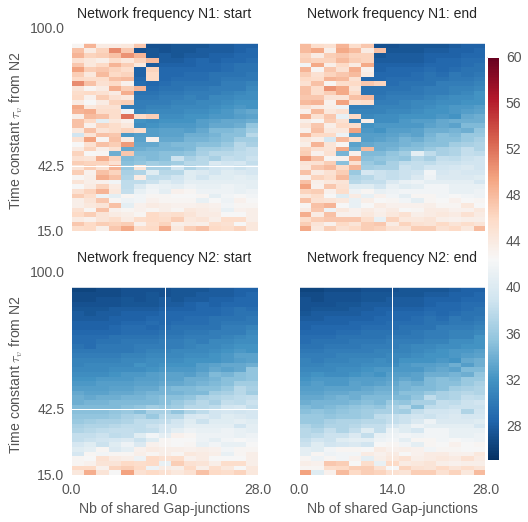

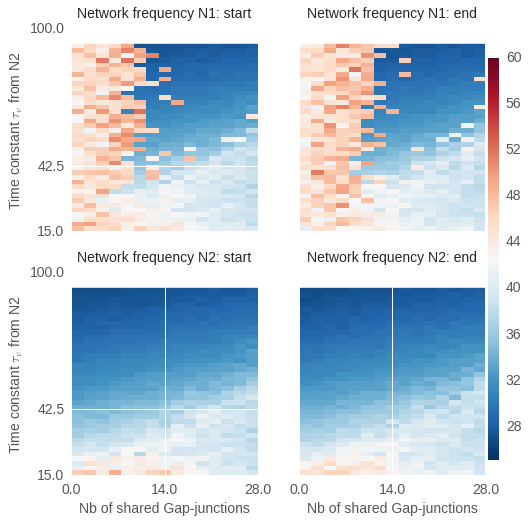

In [15]:
gr= GRAPH(cortex)
gr.plotEvolution(dfplast, kind = 'frequency', LTD=True, vmin = 25, vmax=60, sWII = sWII)
gr.plotEvolution(dfnoplast, kind = 'frequency', LTD=False, vmin = 25 ,vmax=60, sWII=sWII)

(600,)
(40, 15)
(600,)
(40, 15)
(600,)
(40, 15)
(600,)
(40, 15)
(600,)
(40, 15)
(600,)
(40, 15)
(600,)
(40, 15)
(600,)
(40, 15)


0

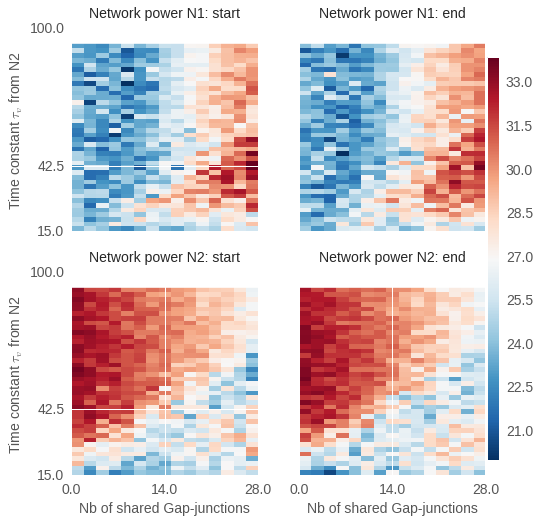

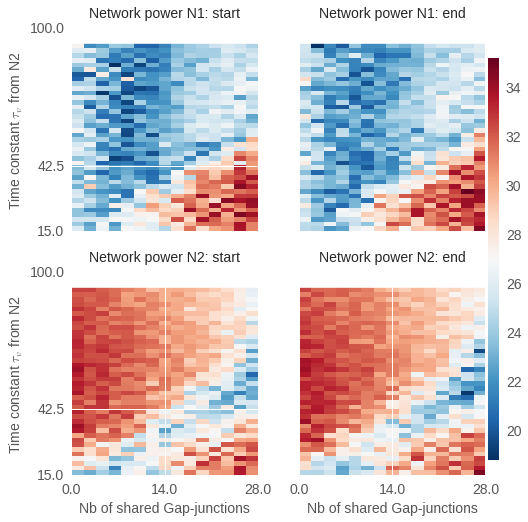

In [16]:
gr=GRAPH(cortex)
gr.plotEvolution(dfplast, kind='power', LTD=True, sWII=sWII)
gr.plotEvolution(dfnoplast, kind='power', LTD=False, sWII=sWII)

(600,)
(40, 15)
(600,)
(40, 15)
(600,)
(40, 15)
(600,)
(40, 15)


0

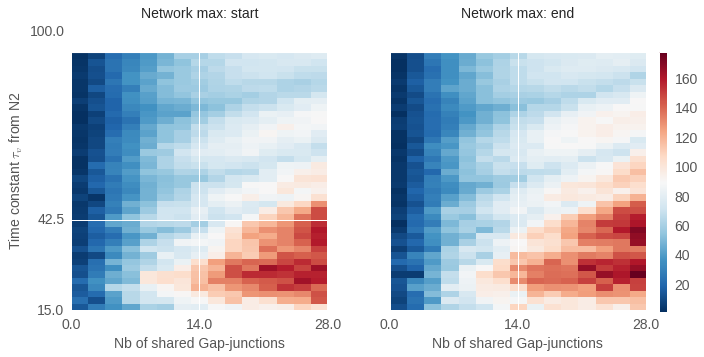

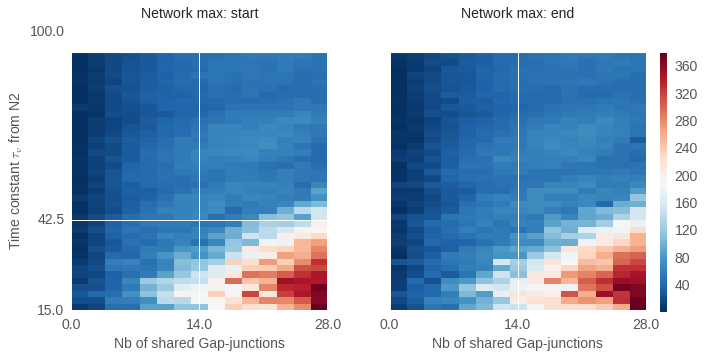

In [17]:
gr = GRAPH(cortex)
gr.plotCoherenceEvolution(df, kind='max', LTD=True, sWII=sWII)
gr.plotCoherenceEvolution(df, kind='max', LTD=False, sWII=sWII)


(600,)
(40, 15)
(600,)
(40, 15)
(600,)
(40, 15)
(600,)
(40, 15)


0

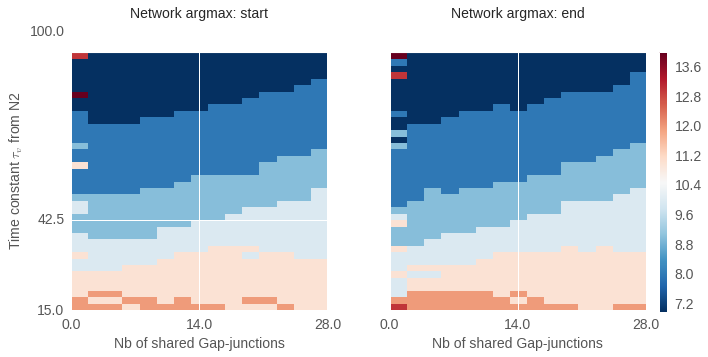

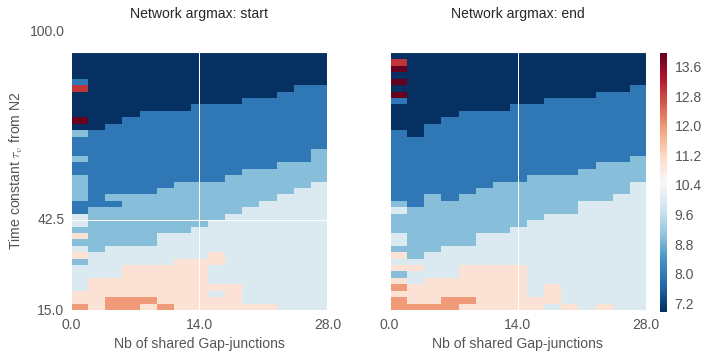

In [18]:
gr.plotCoherenceEvolution(df, kind='argmax', LTD=True,sWII=sWII)
gr.plotCoherenceEvolution(df, kind='argmax', LTD=False,sWII=sWII)

(600,)
(40, 15)
(600,)
(40, 15)
(600,)
(40, 15)
(600,)
(40, 15)
(600,)
(40, 15)
(600,)
(40, 15)
(600,)
(40, 15)
(600,)
(40, 15)


0

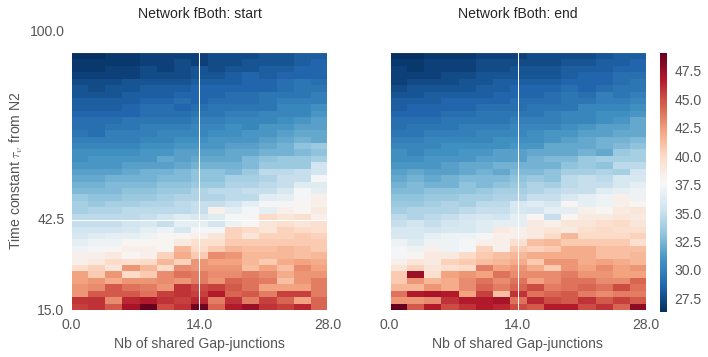

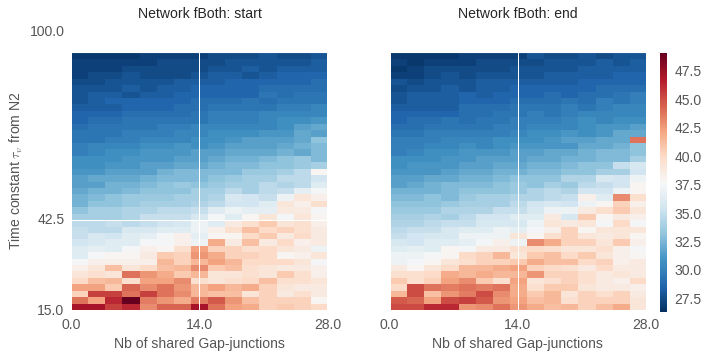

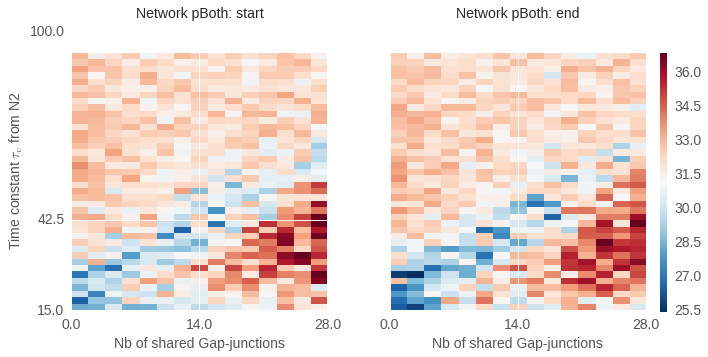

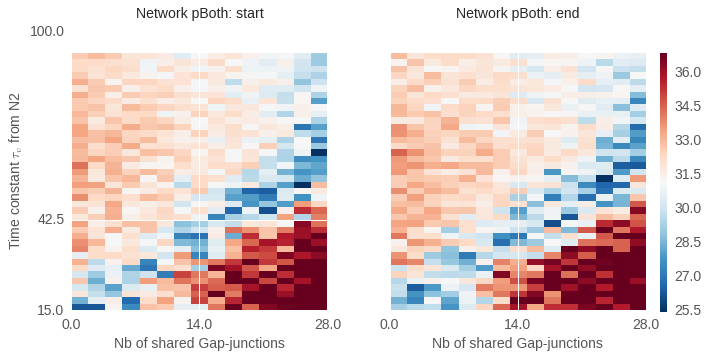

In [19]:
gr = GRAPH(cortex)
gr.plotCoherenceEvolution(df, kind='fBoth', LTD=True, sWII = sWII, 
                         vmax=dfplast['fBothEnd'].max(), vmin=dfplast['fBothEnd'].min())
gr.plotCoherenceEvolution(df, kind='fBoth', LTD=False, sWII = sWII,
                          vmax=dfplast['fBothEnd'].max(), vmin=dfplast['fBothEnd'].min())

gr.plotCoherenceEvolution(df, kind='pBoth', LTD=True, sWII = sWII,
                         vmax=dfplast['pBothEnd'].max(), vmin=dfplast['pBothEnd'].min())
gr.plotCoherenceEvolution(df, kind='pBoth', LTD=False, sWII = sWII, 
                          vmax=dfplast['pBothEnd'].max(), vmin=dfplast['pBothEnd'].min())

/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


0

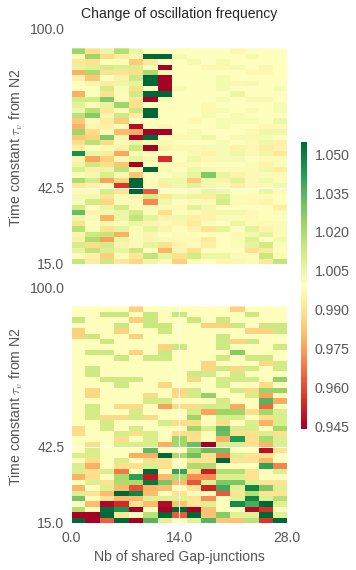

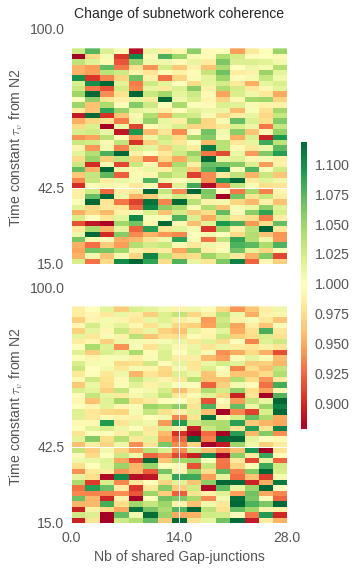

In [20]:
gr = GRAPH(cortex)
gr.plotChange2(df, 'f', 'N1', both=True, title='Change of oscillation frequency', sWII=sWII, LTD=True)
gr.plotChange2(df, 'p', 'N1', both=True, title='Change of subnetwork coherence', sWII=sWII)
# plotChange('f1', 'N1')
# plotChange('f1', 'N1', both=True)
# plotChange('f2', 'N2', both=True)
# plotChange('p1', 'N1', both=True)
# plotChange('p2', 'N2', both=True)

## CSD BEFORE AFTER

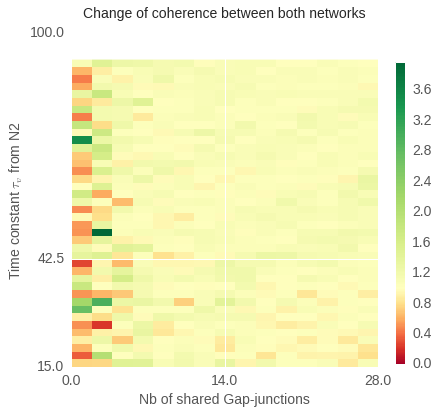

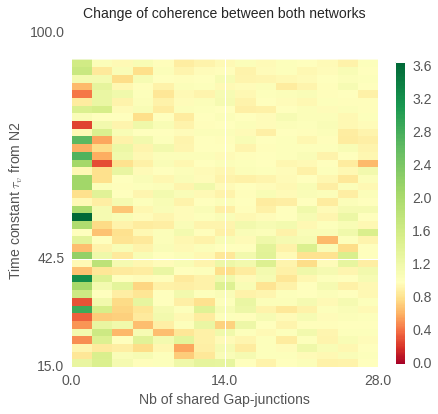

In [21]:
gr = GRAPH(cortex)
# power
gr.plotChange(df, 'max', title="Change of coherence between both networks", sWII=sWII, LTD=True)
gr.plotChange(df, 'max', title="Change of coherence between both networks", sWII=sWII, LTD=False)
# freq
# gr.plotChange(df, 'argmax', title="Change of frequency between both networks", sWII=sWII, LTD=True)
# gr.plotChange(df, 'argmax', title="Change of frequency between both networks", sWII=sWII, LTD=False)

## FOURIER (i1+i2) BEFORE AFTER

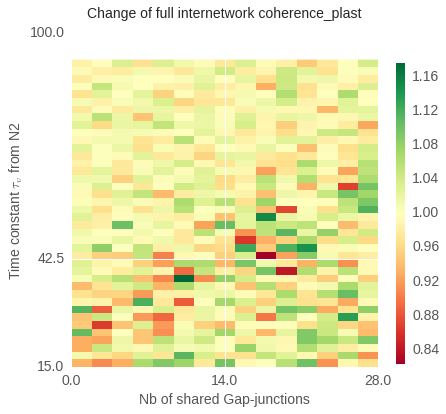

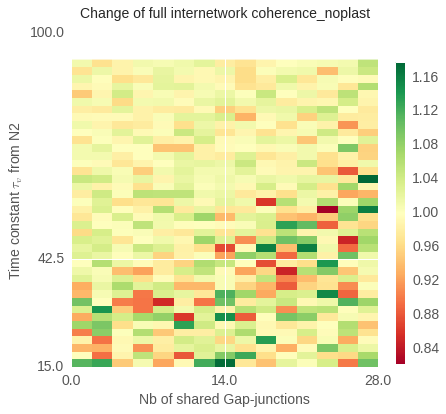

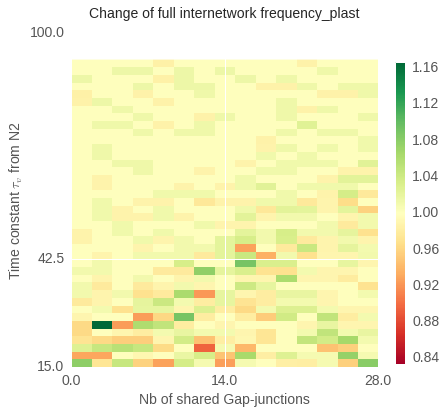

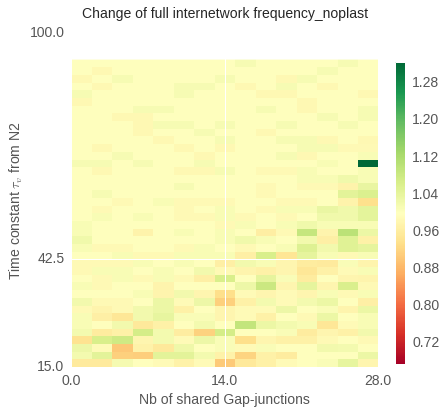

In [22]:
# power
gr.plotChange(df, 'pBoth', title="Change of full internetwork coherence_plast", LTD=True, sWII=sWII)
gr.plotChange(df, 'pBoth', title="Change of full internetwork coherence_noplast", LTD=False, sWII =sWII)
# freq
gr.plotChange(df, 'fBoth', title="Change of full internetwork frequency_plast", LTD=True, sWII = sWII)
gr.plotChange(df, 'fBoth', title="Change of full internetwork frequency_noplast", LTD=False, sWII = sWII)

## Plot difference between with and without plasticity

/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


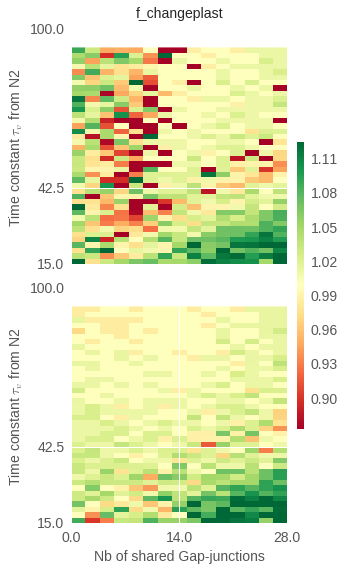

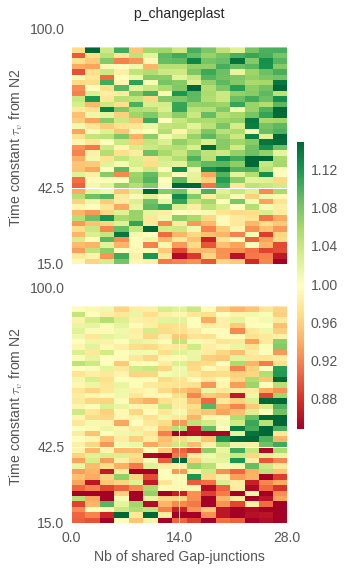

In [23]:
gr.plotChangePlast2(df, 'f', 'N1', both=True, title='f_changeplast', sWII=sWII)
plt.savefig(DIRECTORY+'f_changeplast_%d_%d.svg'%(sWII,N))
plt.figure()
gr.plotChangePlast2(df, 'p', 'N1', both=True, title='p_changeplast', sWII=sWII)
plt.savefig(DIRECTORY+'p_changeplast_%d_%d.svg'%(sWII,N))


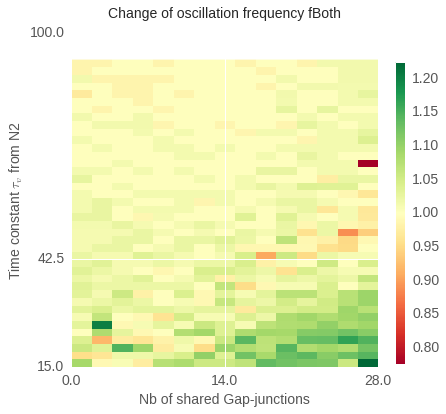

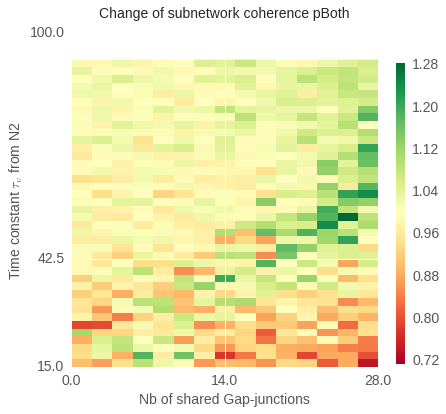

In [24]:
gr = GRAPH(cortex)
# gr.plotChangePlast(df, 'max', title='Change of oscillation frequency', sWII=10, vmax=1.3)
# gr.plotChangePlast(df, 'argmax', title='Change of subnetwork coherence', sWII=10)
gr.plotChangePlast(df, 'fBoth', title='Change of oscillation frequency fBoth', sWII=sWII)
# plt.savefig(DIRECTORY+'change_of_fBoth_plast_vs_noplast.pdf')
plt.figure()
gr.plotChangePlast(df, 'pBoth', title='Change of subnetwork coherence pBoth', sWII=sWII)
# plt.savefig(DIRECTORY+'change_of_pBoth_plast_vs_noplast.pdf')


In [25]:
# # c = cortex
# c.with_currents = True
# c.N = 300
# c.g = 10
# c.d1 = 10
# c.d2 = 1012
# c.d3 = 10
# c.T = 1020
# c.tauv = 15
# c.sG=20
# c.sWII=0
# c.dt=0.25
# # c.runSimulation(tauv=c.tauv)
# # c.readSimulation()
# # gr.plotWeights(tauv=c.tauv)

In [26]:
# t0 = t.time()

# c.runSimulation(tauv=c.tauv)
# print(t.time()-t0)

In [27]:
# c.readSimulation()
# plt.plot(c.voltage)

In [28]:
# c.dt = 0.25
# c.N = 400
# c.g = 10
# c.d1 = 10
# c.d2 = 30000
# c.d3 = 10
# c.initTime()
# c.sigma = 60
# c.WII = 1400 #2800
# c.S = 100
# c.model = "gp-izh-subnetworks"
# c.glob = 0

# # shared weights
# c.sG = 10
# c.sWII = 10

# c.FACT = 1
# c.r=0

# c.ratio = 15
# c.LTD  = 1e-0*4.7e-6 * c.FACT * c.N
# c.LTP = c.ratio * c.LTD

# c.tauv=15

# c.with_currents = True

# # for S in np.arange(50,400,50):
# #     Parallel(n_jobs=8)(delayed(cortex.runSimulation)(N,0, G, S, d1, d2, d3, before, after, sigma, \
# # WII, LTP, LTD) for G in np.linspace(1,9,"8))

# sWIIList = [0,10]
# sGList = [0,1,5,10,15,20,25]
# sGList = np.arange(0,25,4)
# LTDList = [1e-9*4.7e-6 * c.FACT * c.N, 1e-0*4.7e-6 * c.FACT * c.N]
# taulist = np.arange(11,95,4)
# c.LTD = LTDList[0]
# c.sG = sGList[0]
# c.LTP = c.ratio * c.LTD
# c.readSimulation()

In [29]:
# dfnoplast['fBothEnd'].var()

In [30]:
# c.d2 = 10000
# c.N = 50
# c.after = 1000
# c.dt=0.25
# c.LTD = LTDList[1]*10
# c.LTP = c.LTD * c.ratio
# c.T = c.d1+c.d2+c.d3
# c.runSimulation()

In [31]:
# c.readSimulation()
# c.gammaN1[-10:]

## PLOT DIAGRAM + PLAST COMPARISON FOR COHERENCE

In [32]:
#create new SVG figure
fig = sg.SVGFigure("20cm", "7cm")

# load matpotlib-generated figures
fig1 = sg.fromfile(FIG_DIR + str(todayStr) + '/power_clusterTrue_%d_%d.svg'%(sWII,N))
fig2 = sg.fromfile(FIG_DIR + str(todayStr) + '/power_clusterFalse_%d_%d.svg'%(sWII,N))
fig3 = sg.fromfile(FIG_DIR + str(todayStr) + '/p_changeplast_%d_%d.svg'%(sWII,N))

# get the plot objects
scale = 0.45
plot1 = fig1.getroot()
plot1.moveto(0,10,scale= scale)
plot2 = fig2.getroot()
plot2.moveto(280, 10, scale = scale)
plot3 = fig3.getroot()
plot3.moveto(560, 20, scale = scale*0.95)

# add text labels
txt1 = sg.TextElement(5,30, "A", size=12, weight="bold")
plast = sg.TextElement(75,10, "Plasticity", size=12, weight="normal")
noplast = sg.TextElement(350,10, "No plasticity", size=12, weight="normal")
txt2 = sg.TextElement(285,30, "B", size=12, weight="bold")
txt3 = sg.TextElement(560,30, "C", size=12, weight="bold")

# append plots and labels to figure
fig.append([plot1, plot2, plot3])
fig.append([txt1, txt2, txt3, plast, noplast])

# save generated SVG files
fig.save(DIRECTORY + "powercluster_%d_%d.svg"%(sWII,N))
svg2pdf('powercluster_%d_%d'%(sWII,N),DIRECTORY)

## PLOT DIAGRAM + PLAST COMPARISON FOR FREQUENCY

In [33]:
#create new SVG figure
fig = sg.SVGFigure("20cm", "10cm")

# load matpotlib-generated figures
fig1 = sg.fromfile(FIG_DIR + str(todayStr) + '/frequency_clusterTrue_%d_%d.svg'%(sWII,N))
fig2 = sg.fromfile(FIG_DIR + str(todayStr) + '/frequency_clusterFalse_%d_%d.svg'%(sWII,N))
fig3 = sg.fromfile(FIG_DIR + str(todayStr) + '/f_changeplast_%d_%d.svg'%(sWII,N))

# get the plot objects
scale = 0.45
plot1 = fig1.getroot()
plot1.moveto(0,10,scale= scale)
plot2 = fig2.getroot()
plot2.moveto(280, 10, scale = scale)
plot3 = fig3.getroot()
plot3.moveto(560, 20, scale = scale*0.95)

# add text labels
txt1 = sg.TextElement(5,30, "A", size=12, weight="bold")
plast = sg.TextElement(75,10, "Plasticity", size=12, weight="normal")
noplast = sg.TextElement(350,10, "No plasticity", size=12, weight="normal")
txt2 = sg.TextElement(285,30, "B", size=12, weight="bold")
txt3 = sg.TextElement(560,30, "C", size=12, weight="bold")

# append plots and labels to figure
fig.append([plot1, plot2, plot3])
fig.append([txt1, txt2, txt3, plast, noplast])

# save generated SVG files
fig.save(DIRECTORY + 'freqcluster_%d_%d.svg'%(sWII,N))
svg2pdf('freqcluster_%d_%d'%(sWII,N),DIRECTORY)

## PLOT DIAGRAM + PLAST COMPARISON FOR FREQUENCY : INTERNETWORK

In [34]:
#create new SVG figure
fig = sg.SVGFigure("20cm", "15cm")

# load matpotlib-generated figures
fig1 = sg.fromfile(FIG_DIR + str(todayStr) + '/fBoth_cluster_plastFalse_%d_%d.svg'%(sWII,N))
fig2 = sg.fromfile(FIG_DIR + str(todayStr) + '/fBoth_cluster_plastTrue_%d_%d.svg'%(sWII,N))
fig3 = sg.fromfile(FIG_DIR + str(todayStr) + '/fBothChange_of_full_internetwork_frequency_noplast_%d_%d.svg'%(sWII,N))
fig4 = sg.fromfile(FIG_DIR + str(todayStr) + '/fBothChange_of_full_internetwork_frequency_plast_%d_%d.svg'%(sWII,N))
fig5 = sg.fromfile(FIG_DIR + str(todayStr) + '/fboth_changePLAST_cluster_%d_%d.svg'%(sWII,N))


# get the plot objects
scale = 0.45
plot1 = fig1.getroot()
plot1.moveto(0,0,scale= scale)
plot2 = fig2.getroot()
plot2.moveto(0, 180, scale = scale)
plot3 = fig3.getroot()
plot3.moveto(350, 0, scale = scale*0.85)
plot4 = fig4.getroot()
plot4.moveto(350, 180, scale = scale*0.85)
plot5 = fig5.getroot()
plot5.moveto(170, 340, scale = scale*0.85)

# add text labels
# txt1 = sg.TextElement(5,20, "A", size=12, weight="bold")
# txt2 = sg.TextElement(285,20, "B", size=12, weight="bold")
# txt3 = sg.TextElement(560,20, "C", size=12, weight="bold")
txt1 = sg.TextElement(10,130, "No plasticity", size=12, weight="bold")
txt1.rotate(-90, 10,130)
txt2 = sg.TextElement(10,310, "Plasticity", size=12, weight="bold")
txt2.rotate(-90, 10,310)

# append plots and labels to figure
fig.append([plot1, plot2, plot3, plot4, plot5])
fig.append([txt1, txt2])

# save generated SVG files
fig.save(DIRECTORY + 'freq_change_%d_%d.svg'%(sWII,N))
svg2pdf('freq_change_%d_%d'%(sWII, N),DIRECTORY)

## PLOT DIAGRAM + PLAST COMPARISON FOR POWER : INTERNETWORK

In [35]:
#create new SVG figure
fig = sg.SVGFigure("14cm", "14cm")

# load matpotlib-generated figures
fig1 = sg.fromfile(FIG_DIR + str(todayStr) + '/pBoth_cluster_plastFalse_%d_%d.svg'%(sWII,N))
fig2 = sg.fromfile(FIG_DIR + str(todayStr) + '/pBoth_cluster_plastTrue_%d_%d.svg'%(sWII,N))
fig3 = sg.fromfile(FIG_DIR + str(todayStr) + '/pBothChange_of_full_internetwork_coherence_noplast_%d_%d.svg'%(sWII,N))
fig4 = sg.fromfile(FIG_DIR + str(todayStr) + '/pBothChange_of_full_internetwork_coherence_plast_%d_%d.svg'%(sWII,N))
fig5 = sg.fromfile(FIG_DIR + str(todayStr) + '/pboth_changePLAST_cluster_%d_%d.svg'%(sWII,N))

# get the plot objects
scale = 0.45
plot1 = fig1.getroot()
plot1.moveto(0,0,scale= scale)
plot2 = fig2.getroot()
plot2.moveto(0, 180, scale = scale)
plot3 = fig3.getroot()
plot3.moveto(350, 0, scale = scale*0.85)
plot4 = fig4.getroot()
plot4.moveto(350, 180, scale = scale*0.85)
plot5 = fig5.getroot()
plot5.moveto(170, 340, scale = scale*0.85)

# add text labels
# txt1 = sg.TextElement(5,20, "A", size=12, weight="bold")
# txt2 = sg.TextElement(285,20, "B", size=12, weight="bold")
# txt3 = sg.TextElement(560,20, "C", size=12, weight="bold")

# append plots and labels to figure
fig.append([plot1, plot2, plot3, plot4, plot5])
# fig.append([txt1, txt2, txt3])

# save generated SVG files
fig.save(DIRECTORY + 'power_change_%d_%d.svg'%(sWII,N))
svg2pdf('power_change_%d_%d'%(sWII,N),DIRECTORY)

## PLOT CSD PLAST EFFECT

In [36]:

#create new SVG figure
fig = sg.SVGFigure("14cm", "14cm")

# load matpotlib-generated figures
fig1 = sg.fromfile(FIG_DIR + str(todayStr) + '/pBoth_cluster_plastFalse_%d_%d.svg'%(sWII,N))
fig2 = sg.fromfile(FIG_DIR + str(todayStr) + '/pBoth_cluster_plastTrue_%d_%d.svg'%(sWII,N))
fig3 = sg.fromfile(FIG_DIR + str(todayStr) + '/pBothChange_of_full_internetwork_coherence_noplast_%d_%d.svg'%(sWII,N))
fig4 = sg.fromfile(FIG_DIR + str(todayStr) + '/pBothChange_of_full_internetwork_coherence_plast_%d_%d.svg'%(sWII,N))
fig5 = sg.fromfile(FIG_DIR + str(todayStr) + '/pboth_changePLAST_cluster_%d_%d.svg'%(sWII,N))


# get the plot objects
scale = 0.45
plot1 = fig1.getroot()
plot1.moveto(0,0,scale= scale)
plot2 = fig2.getroot()
plot2.moveto(0, 180, scale = scale)
plot3 = fig3.getroot()
plot3.moveto(350, 0, scale = scale*0.85)
plot4 = fig4.getroot()
plot4.moveto(350, 180, scale = scale*0.85)
plot5 = fig5.getroot()
plot5.moveto(170, 340, scale = scale*0.85)

# add text labels
txt1 = sg.TextElement(10,130, "No plasticity", size=12, weight="bold")
txt1.rotate(-90, 10,130)
txt2 = sg.TextElement(10,310, "Plasticity", size=12, weight="bold")
txt2.rotate(-90, 10,310)
# txt2 = sg.TextElement(285,20, "B", size=12, weight="bold")
# txt3 = sg.TextElement(560,20, "C", size=12, weight="bold")

# append plots and labels to figure
fig.append([plot1, plot2, plot3, plot4, plot5])
fig.append([txt1, txt2])

# save generated SVG files
fig.save(DIRECTORY + 'power_change_%d_%d.svg'%(sWII,N))
svg2pdf('power_change_%d_%d'%(sWII,N),DIRECTORY)

## PLOT GAP JUNCTIONS STRENGTH

In [39]:
dfplast['gnmean2'].head()

2419    0.89166
2443    0.90055
2484    0.87810
2550    0.97706
2578    0.86281
Name: gnmean2, dtype: float64

ValueError: zero-size array to reduction operation minimum which has no identity

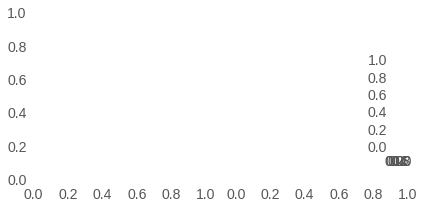

In [41]:
plotGridHeatmap(dfplast, v=1, cols=['gnmean1', 'gnmean2'], cmap="RdYlGn", norm=MidpointNormalize(midpoint=1.), col_wrap=2)
plt.savefig(DIRECTORY + 'plasticity_subnet_%d_%d.svg'%(sWII,N))
svg2pdf('plasticity_subnet_%d_%d'%(sWII,N),DIRECTORY)

## PLOT FREQ CHANGE SUBNET

AttributeError: Unknown property v

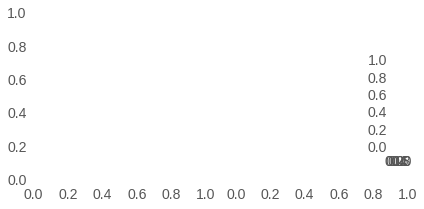

In [43]:
plotGridHeatmap(dfplast, v=10, vmin =0.7, vmax=1.3, cols=['fChange1', 'fChange2'], cmap="RdYlGn", norm=MidpointNormalize(midpoint=1.), col_wrap=2)
plt.savefig(DIRECTORY + 'plasticity_freq_subnet_%d_%d.svg'%(sWII,N))
svg2pdf('plasticity_freq_subnet_%d_%d'%(sWII,N),DIRECTORY)
plotGridHeatmap(dfplast, v=10,vmin =0.7, vmax=1.3, cols=['pChange1', 'pChange2'], cmap="RdYlGn", norm=MidpointNormalize(midpoint=1.), col_wrap=2)
plt.savefig(DIRECTORY + 'plasticity_power_subnet_%d_%d.svg'%(sWII,N))
svg2pdf('plasticity_power_subnet_%d_%d'%(sWII,N),DIRECTORY)

# PLOT ACTIVITY DIAGRAMS

In [ ]:
# N=400
column_names =['gammaC','nuEI','corI', 
               'burst', 'spike' , 'nonburst',
               'burst1', 'spike1' , 'nonburst1',
               'burst2', 'spike2' , 'nonburst2',
               'freq','power', 
               'freq1','power1', 
               'freq2','power2', 
               'sG', 'sWII', 'tauv']
path = os.path.expanduser(CSV_DIR + '20160712' +'/data_sync3_ext%d.csv'%N)
df = pd.read_csv(path, names= column_names ,  dtype ='float32' , sep=";")

# sWII=10
df= df[(df['nuEI']<200)& (df['sWII']==sWII)]

df['ratio'] = df['burst']/df['spike']
df['ratio1'] = df['burst1']/df['spike1']
df['ratio2'] = df['burst2']/df['spike2']

df['rationb'] = df['burst']/df['nonburst']
df['rationb1'] = df['burst1']/df['nonburst1']
df['rationb2'] = df['burst2']/df['nonburst2']
extent = [np.min(df['sG']), np.max(df['sG']), np.min(df['tauv']), np.max(df['tauv'])]

df.tail()

In [ ]:
# plotHeatmap(df, 'burst', 'Bursts', cmap=plt.cm.RdBu_r)
# plotHeatmap(df, 'spike', 'Spikes', cmap=plt.cm.RdBu_r)
# plotHeatmap(df, 'ratio', 'Ratio', cmap=plt.cm.RdBu_r)

In [ ]:
# plotHeatmap(df, 'freq1', '', cmap=plt.cm.RdBu_r)
# plotHeatmap(df, 'freq2', '', cmap=plt.cm.RdBu_r)

In [ ]:
# plotHeatmap(df, 'ratio', '', cmap=plt.cm.RdBu_r)
# plotHeatmap(df, 'rationb', '', cmap=plt.cm.RdBu_r)

In [ ]:
# plotHeatmap(df, 'ratio1', '', cmap=plt.cm.RdBu_r)
# plotHeatmap(df, 'ratio2', '', cmap=plt.cm.RdBu_r)

# plotHeatmap(df, 'rationb1', '', cmap=plt.cm.RdBu_r)
# plotHeatmap(df, 'rationb2', '', cmap=plt.cm.RdBu_r)

In [ ]:
# plotHeatmap(df, 'spike1', '', cmap=plt.cm.RdBu_r)
# plotHeatmap(df, 'burst1', '', cmap=plt.cm.RdBu_r)
# plotHeatmap(df, 'nonburst1', '', cmap=plt.cm.RdBu_r)

# plotHeatmap(df, 'spike2', '', cmap=plt.cm.RdBu_r)
# plotHeatmap(df, 'burst2', '', cmap=plt.cm.RdBu_r)
# plotHeatmap(df, 'nonburst2', '', cmap=plt.cm.RdBu_r)


ValueError: zero-size array to reduction operation minimum which has no identity

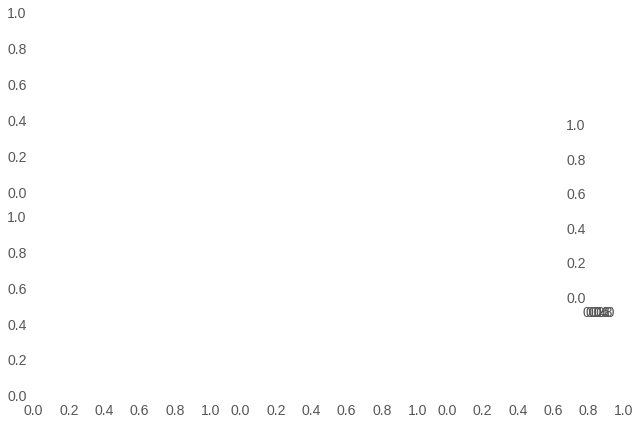

In [42]:
g = plotGridHeatmap(df,v=0, cols=['burst1', 'spike1', 'ratio1', 'burst2', 'spike2', 'ratio2'], cmap=plt.cm.RdBu_r, col_wrap=3 )
plt.savefig(DIRECTORY + 'activity_subnet_%d_%d.svg'%(sWII,N))
svg2pdf('activity_subnet_%d_%d'%(sWII,N),DIRECTORY)

In [ ]:
plotGridHeatmap(df,cols=['burst', 'spike', 'ratio'], cmap=plt.cm.RdBu, col_wrap=3 )
plt.savefig(DIRECTORY + 'activity_full_%d_%d.svg'%(sWII,N))
svg2pdf('activity_full_%d_%d'%(sWII,N),DIRECTORY)
plotGridHeatmap(df,v=True, cols=['freq', 'freq1', 'freq2'], cmap="YlGnBu", col_wrap=3 )
plt.savefig(DIRECTORY + 'freq_subnet_%d_%d.svg'%(sWII,N))
svg2pdf('freq_subnet_%d_%d'%(sWII,N),DIRECTORY)
